## Data and Setup

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

df= pd.read_csv("../../Data/E-CommerceDataAnalysis/OnlineRetail.csv")

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


##### Note that there appears to be null values in the Description and CustomerID fields. Our data scientists won't need the Description field, but they do need customer identifiers, so we will need to deal with the large amount of missing customer ID's.

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


General Observations
1. Data Quality Issues: The presence of negative values in both Quantity and UnitPrice suggests potential data entry errors or specific business logic (like returns or refunds) that need to be addressed.
2. High Variability: Both Quantity and UnitPrice have high standard deviations and large ranges, indicating a wide variety of transaction types, from small to very large orders and prices.
3. CustomerID Completeness: There are fewer entries for CustomerID (406,829) compared to Quantity and UnitPrice (541,909). This suggests that not all transactions are linked to a customer ID, indicating potential missing customer data.
4. 5. Skewness: The large difference between the median (3) and the mean (9.55), along with the presence of extreme values, suggests that the distribution is likely right-skewed, with a long tail of high values.
Outliers: The minimum and maximum values suggest the presence of outliers, which could significantly impact the distribution and summary statistics.


Next Steps
1. Data Cleaning: Address the negative values in Quantity and UnitPrice. Determine if these represent errors or legitimate transactions like returns.
2. Further Analysis: Investigate the transactions with extreme values (both high and low) to understand their nature.
3. Data Imputation: Consider how to handle missing CustomerID values if needed for further analysis.
4. Business Rules: Clarify business rules around negative values and ensure they are correctly represented in the data.

## Visualizations

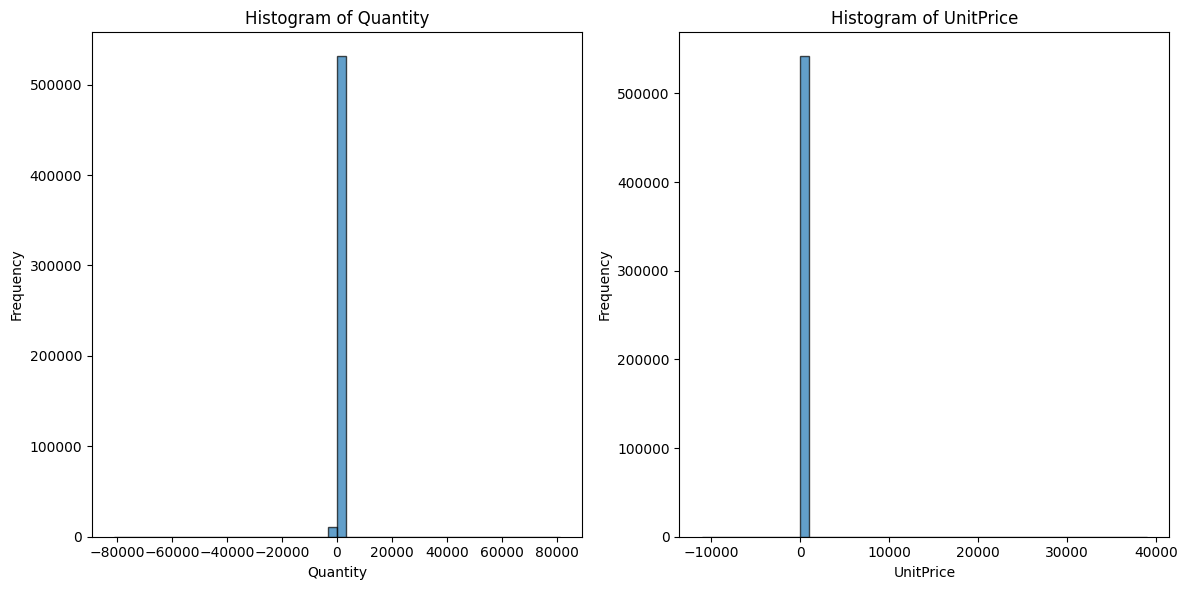

In [9]:
# Histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Quantity'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['UnitPrice'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

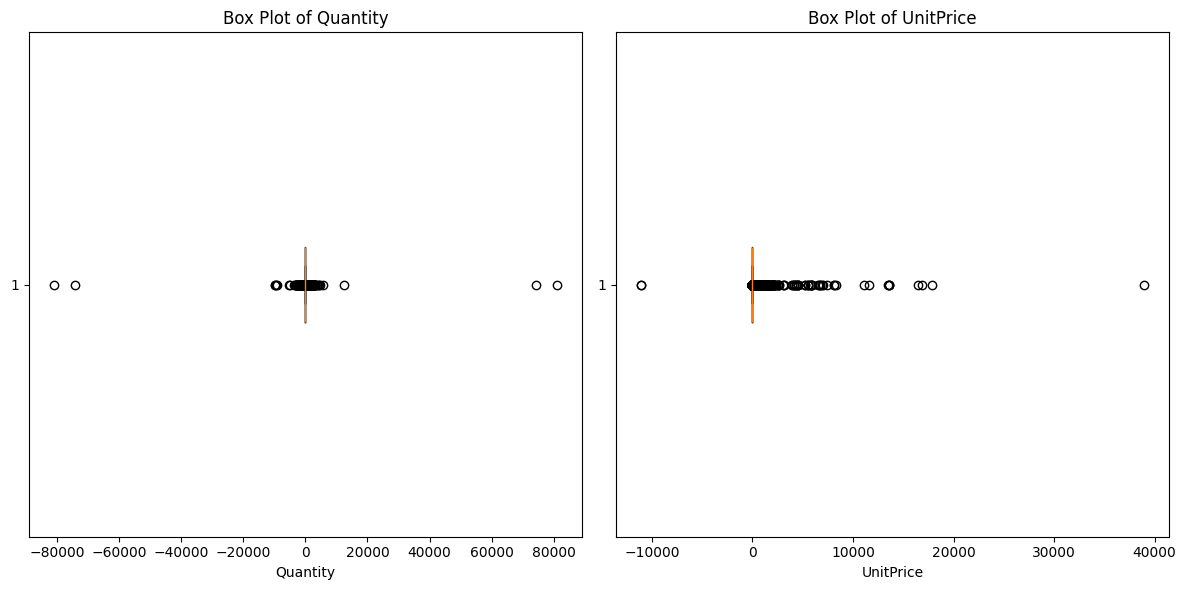

In [10]:
# Box Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df['Quantity'].dropna(), vert=False)
plt.title('Box Plot of Quantity')
plt.xlabel('Quantity')

plt.subplot(1, 2, 2)
plt.boxplot(df['UnitPrice'].dropna(), vert=False)
plt.title('Box Plot of UnitPrice')
plt.xlabel('UnitPrice')

plt.tight_layout()
plt.show()


## Understand the Nature of the Missing Customer IDs

Formulate a strategy for managing the missing customer IDs in the provided online retail dataset. First, calculate the percentage of rows with missing customer IDs to determine if the proportion is low enough to justify dropping them from the DataFrame.

If the proportion is too high, consider the possibility that new customers placing their first orders do not yet have assigned IDs. Analyze the data to evaluate this explanation. Specifically, compare the average number of items per order for orders with customer IDs to those without, ensuring that the averages are within the same order of magnitude.

In [12]:
    null_customers = df[df.CustomerID.isnull()]
    null_customers.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Quantity,Log_UnitPrice
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom,4.043051,0.000000
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom,0.693147,1.255616
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom,1.098612,1.255616
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom,1.609438,0.615186
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom,1.098612,0.978326
...,...,...,...,...,...,...,...,...,...,...
1537,536544,22207,FRYING PAN UNION FLAG,1,12/1/2010 14:32,8.47,NaN,United Kingdom,0.693147,2.248129
1538,536544,22219,LOVEBIRD HANGING DECORATION WHITE,3,12/1/2010 14:32,1.66,NaN,United Kingdom,1.386294,0.978326
1539,536544,22224,WHITE LOVEBIRD LANTERN,1,12/1/2010 14:32,5.91,NaN,United Kingdom,0.693147,1.932970
1540,536544,22265,EASTER DECORATION NATURAL CHICK,2,12/1/2010 14:32,1.28,NaN,United Kingdom,1.098612,0.824175


Compute the percentage of these missing customer IDs compared to the complete data set. Take the length of our new null_customers DataFrame, and dividing it by the length of our original df DataFrame.

In [13]:
len(null_customers) / len(df)

0.249266943342886

Measure the average number of items ordered per invoice by taking the total rows in our original df DataFrame and dividing by the number of unique InvoiceNo values in it.

In [15]:
len(df)/df['InvoiceNo'].nunique()

20.923127413127414

Compare that to the average items per invoice for the invoices that are missing customer IDs. We'll compute this as the total number of items in our null_customers DataFrame divided by the number of unique invoices in it.

In [17]:
len(null_customers)/null_customers['InvoiceNo'].nunique()

36.40970350404313

The number is higher - 36 - but at least we're within the same order of magnitude. It seems plausible that these are just new customers we're seeing, and it will be up to us to fabricate new customer IDs for them in our pre-processed data set.

## Impute Customer IDs for Rows that are missing them

In [20]:
#Check the range of existing customer IDs in our original DataFrame, using the describe() function. 
df['CustomerID'].describe() 

#Find unique invoice numbers in the Null Customers Ids Dataframe
null_customers['InvoiceNo'].nunique()

#Use Pandas' factorize method to generate a sequential code for every unique value in the series you give it. It returns an array of those codes, and a matching Index of the unique values they map to.
codes, uniques = pd.factorize(null_customers.InvoiceNo)

In [21]:
codes

array([   0,    1,    1, ..., 3709, 3709, 3709])

In [22]:
uniques

Index(['536414', '536544', '536545', '536546', '536547', '536549', '536550',
       '536552', '536553', '536554',
       ...
       '581256', '581406', '581408', '581422', '581431', '581435', '581439',
       '581492', '581497', '581498'],
      dtype='object', length=3710)

In [24]:
# Number of new CustomerDs match the number of rows in null_customers DataFrame

len(codes) == len(null_customers)

True

In [25]:
    #Insert a new column named "ImputedCustomerID" containing these new, fabricated IDs.
    null_customers.insert(7, "ImputedCustomerID", codes, True)
    null_customers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,ImputedCustomerID,Country,Log_Quantity,Log_UnitPrice
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,0,United Kingdom,4.043051,0.000000
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,1,United Kingdom,0.693147,1.255616
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,1,United Kingdom,1.098612,1.255616
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,1,United Kingdom,1.609438,0.615186
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,1,United Kingdom,1.098612,0.978326


In [26]:
#Create a "non_null_customers" DataFrame by dropping any rows from our original DataFrame that have undefined CustomerIDs:

non_null_customers = df.dropna(axis=0, subset=['CustomerID'])


#Confirm the length of the null and non-null DataFrames adds up to the length of our original data:

(len(non_null_customers) + len(null_customers)) == len(df)

True

In [28]:
#Concatenate this with our null_customers DataFrame to produce our final result: a DataFrame where every row has an ImputedCustomerID.

imputed_df = pd.concat([non_null_customers, null_customers], ignore_index=True)
imputed_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Quantity,Log_UnitPrice,ImputedCustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.945910,1.266948,NaN
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.197225,1.321756,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.945910,1.479329,NaN


In [29]:
len(imputed_df) == len(df)

True

## Drop Rows That Do Not Reflect Actual Customer Purchases

In [31]:
imputed_df.describe()

/Users/chetanayogeesh/Documents/GitHub/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Quantity,UnitPrice,CustomerID,Log_Quantity,Log_UnitPrice,ImputedCustomerID
count,541909.000000,541909.000000,406829.000000,5.354690e+05,541907.000000,135080.000000
mean,9.552250,4.611114,15287.690570,-inf,1.239656,1908.772387
std,218.081158,96.759853,1713.600303,NaN,0.658708,1200.225472
min,-80995.000000,-11062.060000,12346.000000,-inf,0.000000,0.000000
25%,1.000000,1.250000,13953.000000,6.931472e-01,0.810930,714.000000
50%,3.000000,2.080000,15152.000000,1.386294e+00,1.124930,2039.000000
75%,10.000000,4.130000,16791.000000,2.397895e+00,1.635106,2995.000000
max,80995.000000,38970.000000,18287.000000,1.130216e+01,10.570573,3709.000000


In [32]:
#Identify the nature of negative unit prices. Filter our DataFrame for rows with a negative UnitPrice:

negativeUnitPrices = imputed_df[imputed_df['UnitPrice'] < 0]
negativeUnitPrices.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Quantity,Log_UnitPrice,ImputedCustomerID
490920,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom,0.693147,NaN,2498.0
490921,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom,0.693147,NaN,2499.0



These are accounting adjustments that should be removed.

In [33]:
zeroPrices = imputed_df[imputed_df['UnitPrice'] == 0]
zeroPrices.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Quantity,Log_UnitPrice,ImputedCustomerID
7012,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany,0.693147,0.0,NaN
23071,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom,1.609438,0.0,NaN
26046,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE,2.397895,0.0,NaN
29881,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom,3.218876,0.0,NaN
29883,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom,3.218876,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
411019,537437,90167,NaN,10,12/6/2010 17:00,0.0,NaN,United Kingdom,2.397895,0.0,86.0
411020,537438,22959,NaN,13,12/6/2010 17:00,0.0,NaN,United Kingdom,2.639057,0.0,87.0
411021,537439,37474,NaN,1,12/6/2010 17:01,0.0,NaN,United Kingdom,0.693147,0.0,88.0
411024,537449,21054,NaN,-30,12/7/2010 9:26,0.0,NaN,United Kingdom,NaN,0.0,90.0


In [35]:
#Before deciding to drop them, compute how many rows have a price of zero
len(zeroPrices)

2515

In [37]:
#Create a new DataFrame called positivePrices, which filters out all of these negative and zero-price items.
positivePrices = imputed_df[imputed_df['UnitPrice'] > 0]

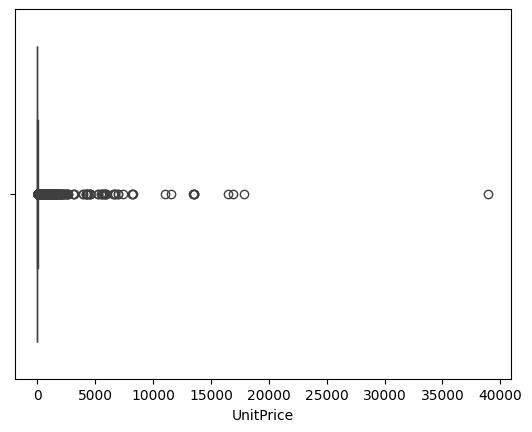

In [38]:
#Visualize the distribution of the positive unit price rows we have left, using a Seaborn BoxPlot:

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x = positivePrices['UnitPrice'])
plt.show()

In [39]:
#One common way of identifying outliers is "1.5 IQR." Compute the 25% and 75% quartiles of our data, and then compute the outlier boundaries:

quartile1 = positivePrices['UnitPrice'].quantile(q=0.25)
quartile3 = positivePrices['UnitPrice'].quantile(q=0.75)
IQR = quartile3 - quartile1
print(quartile1, quartile3, IQR)
lower_limit = quartile1 - 1.5 * IQR
upper_limit = quartile3 + 1.5 * IQR
print(lower_limit, upper_limit)

1.25 4.13 2.88
-3.0700000000000003 8.45


According to this measure, a unit price higher than 8.45 could be considered an outlier. 

In [40]:
#Filter out rows with a UnitPrice higher than 8.45 and put them into a new DataFrame. Sort it to view what's at the beginning and end of these outliers. Start with the lowest-price outliers:

price_outliers = positivePrices[positivePrices['UnitPrice'] > upper_limit]
sorted_outliers = price_outliers.sort_values(by=['UnitPrice'])
sorted_outliers.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Quantity,Log_UnitPrice,ImputedCustomerID
413236,537823,22130,PARTY CONE CHRISTMAS DECORATION,1,12/8/2010 14:25,8.47,NaN,United Kingdom,0.693147,2.248129,125.0
413261,537823,22184,CAKE STAND VICTORIAN FILIGREE LARGE,3,12/8/2010 14:25,8.47,NaN,United Kingdom,1.386294,2.248129,125.0
413262,537823,22187,GREEN CHRISTMAS TREE CARD HOLDER,1,12/8/2010 14:25,8.47,NaN,United Kingdom,0.693147,2.248129,125.0
413263,537823,22189,CREAM HEART CARD HOLDER,1,12/8/2010 14:25,8.47,NaN,United Kingdom,0.693147,2.248129,125.0
413269,537823,22207,FRYING PAN UNION FLAG,2,12/8/2010 14:25,8.47,NaN,United Kingdom,1.098612,2.248129,125.0
413287,537823,22306,SILVER MUG BONE CHINA TREE OF LIFE,1,12/8/2010 14:25,8.47,NaN,United Kingdom,0.693147,2.248129,125.0
413305,537823,22372,AIRLINE BAG VINTAGE WORLD CHAMPION,1,12/8/2010 14:25,8.47,NaN,United Kingdom,0.693147,2.248129,125.0
413306,537823,22374,AIRLINE BAG VINTAGE JET SET RED,1,12/8/2010 14:25,8.47,NaN,United Kingdom,0.693147,2.248129,125.0
413953,538071,22891,TEA FOR ONE POLKADOT,2,12/9/2010 14:09,8.47,NaN,United Kingdom,1.098612,2.248129,154.0
413974,538071,22942,CHRISTMAS LIGHTS 10 SANTAS,1,12/9/2010 14:09,8.47,NaN,United Kingdom,0.693147,2.248129,154.0


These are legitimate purchases and should not be dropped.

In [41]:
sorted_outliers.tail(1000)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Quantity,Log_UnitPrice,ImputedCustomerID
446047,546650,DOT,DOTCOM POSTAGE,1,3/15/2011 14:17,111.79,NaN,United Kingdom,0.693147,4.725528,866.0
439396,544089,DOT,DOTCOM POSTAGE,1,2/15/2011 17:51,111.86,NaN,United Kingdom,0.693147,4.726148,672.0
484186,560573,M,Manual,1,7/19/2011 14:47,112.35,NaN,United Kingdom,0.693147,4.730480,2276.0
193200,C560572,M,Manual,-1,7/19/2011 14:45,112.35,17065.0,United Kingdom,-inf,4.730480,NaN
420871,539718,DOT,DOTCOM POSTAGE,1,12/21/2010 13:06,112.37,NaN,United Kingdom,0.693147,4.730657,277.0
...,...,...,...,...,...,...,...,...,...,...,...
411100,C537630,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:04,13541.33,NaN,United Kingdom,-inf,9.513576,105.0
422887,C540118,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:57,16453.71,NaN,United Kingdom,-inf,9.708367,334.0
422886,C540117,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:55,16888.02,NaN,United Kingdom,-inf,9.734419,333.0
535682,C580605,AMAZONFEE,AMAZON FEE,-1,12/5/2011 11:36,17836.46,NaN,United Kingdom,-inf,9.789056,3653.0


These outliers are postage fees, seller fees, and manual adjustments. These should be dropped, and may be identified by their StockCode values.

In [42]:
#Produce a list of the stock codes observed in these outliers, using the unique function:
sorted_outliers.tail(1000).StockCode.unique()

array(['DOT', 'M', 'D', '22656', '22823', '22655', 'S', 'POST',
       'BANK CHARGES', '22828', '22827', 'C2', '22826', 'AMAZONFEE',
       'CRUK', '22502', 'B'], dtype=object)

In [43]:
#StockCodes DOT, M, D, S, POST, BANK_CHARGES, C2, AMAZONFEE, CRUK, and B do not represent customer behavior and should be dropped:

invalidStockCodes = ['DOT', 'M', 'D', 'S', 'POST', 'BANK CHARGES', 'C2', 'AMAZONFEE', 'CRUK', 'B']
clean = positivePrices[~positivePrices['StockCode'].isin(invalidStockCodes)]
len(clean)

536497

In [44]:

clean.sort_values(by=['UnitPrice']).tail(1000)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Quantity,Log_UnitPrice,ImputedCustomerID
420554,539631,84968A,SET OF 16 VINTAGE ROSE CUTLERY,1,12/20/2010 15:03,25.49,NaN,United Kingdom,0.693147,3.276767,264.0
410408,537434,21258,VICTORIAN SEWING BOX LARGE,2,12/6/2010 16:57,25.49,NaN,United Kingdom,1.098612,3.276767,84.0
412207,537645,21258,VICTORIAN SEWING BOX LARGE,3,12/7/2010 15:34,25.49,NaN,United Kingdom,1.386294,3.276767,115.0
417072,538880,21258,VICTORIAN SEWING BOX LARGE,1,12/14/2010 15:52,25.49,NaN,United Kingdom,0.693147,3.276767,218.0
412072,537643,21258,VICTORIAN SEWING BOX LARGE,2,12/7/2010 15:34,25.49,NaN,United Kingdom,1.098612,3.276767,114.0
...,...,...,...,...,...,...,...,...,...,...,...
3784,536835,22655,VINTAGE RED KITCHEN CABINET,1,12/2/2010 18:06,295.00,13145.0,United Kingdom,0.693147,5.690359,NaN
24190,C539438,22655,VINTAGE RED KITCHEN CABINET,-1,12/17/2010 15:11,295.00,16607.0,United Kingdom,-inf,5.690359,NaN
32882,540647,22655,VINTAGE RED KITCHEN CABINET,1,1/10/2011 14:57,295.00,17406.0,United Kingdom,0.693147,5.690359,NaN
159241,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,6/10/2011 15:33,649.50,15098.0,United Kingdom,0.693147,6.477741,NaN


These are all legitimate purchases. We have successfully removed outliers in UnitPrice that do not reflect real customer transactions.

You may have noticed we also have some large values in the Quantity column. However, our company sells primarily to wholesalers, and orders with large quantities are not uncommon.